In [ ]:
import os
import tensorflow as tf
import numpy as np
from google.colab import drive
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import Dense, Conv2D, GlobalAvgPool2D, Input
from tensorflow.keras import callbacks, optimizers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/animal_classification

[Errno 2] No such file or directory: 'drive/MyDrive/animal_classification'
/content/drive/MyDrive/animal_classification


In [ ]:
def img_data(dir_path, target_size, batch, class_lst, pre_processs):
  if pre_processs:
    generate_object = ImageDataGenerator(preprocessing_function=pre_processs)
  else:
    generate_object = ImageDataGenerator()
   
  return (generate_object.flow_from_directory(dir_path, target_size=target_size, batch_size=batch, 
                                              class_mode='sparse', classes=class_lst, shuffle=True)) 

In [ ]:
train_data_gen = img_data('train', (224, 224), 500, os.listdir('train'), preprocess_input)
valid_data_gen = img_data('test', (224, 224), 500, os.listdir('test'), preprocess_input)

Found 2180 images belonging to 6 classes.
Found 500 images belonging to 6 classes.


In [ ]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    alpha=1.0,
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)

In [ ]:
base_model.trainable=False

In [ ]:
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(GlobalAvgPool2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
elst = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

In [ ]:
save_ck = callbacks.ModelCheckpoint('.mdl_wt.hdf5', save_best_only=True, monitor='val_loss', mode='min') 

In [ ]:
model.fit(train_data_gen, batch_size=500, validation_data=valid_data_gen, callbacks=[elst, save_ck], epochs=10)

Epoch 1/10
5/5 [==============================] - 60s 11s/step - loss: 0.8571 - accuracy: 0.6844 - val_loss: 7.2887 - val_accuracy: 0.0100
Epoch 2/10
5/5 [==============================] - 54s 11s/step - loss: 0.1238 - accuracy: 0.9651 - val_loss: 10.4343 - val_accuracy: 0.0120
Epoch 3/10
5/5 [==============================] - 52s 10s/step - loss: 0.0720 - accuracy: 0.9798 - val_loss: 11.9073 - val_accuracy: 0.0120
Epoch 4/10
5/5 [==============================] - 55s 11s/step - loss: 0.0479 - accuracy: 0.9876 - val_loss: 12.6629 - val_accuracy: 0.0080
Epoch 5/10
5/5 [==============================] - 56s 11s/step - loss: 0.0333 - accuracy: 0.9922 - val_loss: 12.9336 - val_accuracy: 0.0080
Epoch 6/10
5/5 [==============================] - 56s 11s/step - loss: 0.0205 - accuracy: 0.9959 - val_loss: 12.9887 - val_accuracy: 0.0200


In [ ]:
# install module streamlit
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# install module protobuf
!pip install protobuf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Project Klasifikasi Hewan
Mengklasifikasikan 6 hewan
1/1 [==============================] - 1s 596ms/step

Predicted Label for the image is Chicken


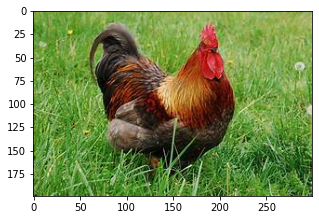

In [ ]:
# Implementasi program pengklasifikasian hewan kedalam kode python untuk memasukan file image bertipe .jpeg
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
import io
from matplotlib.pyplot import figure, imread, imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input as mobilenet_v2_preprocess_input


model = tf.keras.models.load_model("mdl_wt.hdf5")

print('Project Klasifikasi Hewan')
print('Mengklasifikasikan 6 hewan')
# st.subheader('Mengklasifikasikan 6 hewan (dog, horse, elephant, butterfly, chicken, cat)')

map_dict = {0: 'Dog',
            1: 'Horse',
            2: 'Elephant',
            3: 'Butterfly',
            4: 'Chicken',
            5: 'Cat',
}

uploaded_file = cv2.imread("OIP-Je2ohU4bSOtqUz6Z462RgAHaE5.jpeg", cv2.IMREAD_GRAYSCALE)
opencv_image = cv2.cvtColor(uploaded_file, cv2.COLOR_BGR2RGB)
resized = cv2.resize(opencv_image,(224,224))
resized = mobilenet_v2_preprocess_input(resized)
img_reshape = resized[np.newaxis,...]
prediction = model.predict(img_reshape).argmax()
figure(figsize=(5,5))
image = imread('OIP-Je2ohU4bSOtqUz6Z462RgAHaE5.jpeg')
imshow(image)
print("")
print("Predicted Label for the image is",format(map_dict [prediction]))